# **SAAI** Overview | Background

The Summer School on Affordable AI **SAAI** is a project of the AGYA working group Innovation in close collaboration with the AGYA working group Health and Society. [The Arab-German Young Academy of Sciences and Humanities (AGYA)](https://agya.info/) is funded by the  [German Federal Ministry of Education and Research (BMBF)](https://www.bmbf.de/bmbf/en/home/home_node.html) and various Arab and German cooperation partners.
<img src="https://imgur.com/hMpk6HK.png" width="800">
<img src="https://imgur.com/b9n0Ow7.jpg" width="800">
<img src="https://imgur.com/EvXNz7j.jpg" width="800">
<img src="https://imgur.com/amMP7c7.jpg" width="800">

## Autoencoders(AEs)

Autoencoders are a type of Artificial Neural Networks(ANNs). They belong to the family of deep generative models(DGMs) that learn to encode data into a lower-dimensional space referred to as **latent space** or **latent representation** and then decode it back to the original data space, typically for the purpose of dimensionality reduction or feature extraction. Autoencoders are designed to encode the input into a compressed and learned representation and then reconstruct the output from this representation as closely as possible to the original input.

![Variational Autoencoder](./autoencoder-architecture.png)

Reference: https://blog.bayeslabs.co/2019/06/04/All-you-need-to-know-about-Vae.html


## Variational Autoencoders(VAEs)

VAEs are a type of Artificial Neural Networks(ANNs), and they belong to the family of deep generative models(DGMs) that learn to encode data into a lower-dimensional space referred to as **latent space** or **latent representation** and then decode it back to the original data space. VAEs map inputs to a probability distribution in the latent space. This approach allows for generating new, similar data points (e.g., images) by sampling from the latent space distribution. Thus, they are used for unsupervised learning tasks, particularly in generating new data points (e.g., images) similar to the input dataset.

![Variational Autoencoder](./vae-gaussian.png)


Reference: https://blog.bayeslabs.co/2019/06/04/All-you-need-to-know-about-Vae.html


### Components of a Variational Autoencoder

- Probabilistic Encoder $ q_{\phi}(z \mid x) $ : The encoder maps the input data to a latent space. Instead of directly mapping to a single point in this space, it maps to a distribution, typically a Gaussian distribution with mean $ \mu $ and variance $ \sigma $ parameters. This is what makes VAEs "variational".

- Latent Space or Latent Representation $ z $ : This is the lower-dimensional space where the encoded data is represented. The latent variables follow a specified prior distribution, usually a standard normal distribution. Note: latent vector in the figure
- Probabilistic Decoder $ p_{\theta}(x \mid z) $: The decoder takes samples from the latent space and maps them back to the original data space. The goal is for the decoded samples to be as close as possible to the original data, ideally identical.

## Why VAEs if we have AEs?

The key difference between VAEs and the traditional AE architecture is introducing a probabilistic framework for generating the input data's compressed representation (latent space). Having a probabilistic allows for the following points: 

- **Latent Space Regularization**: VAEs impose a probabilistic structure on the latent space, enforcing a prior distribution (typically a Gaussian) on the encoded representations. This regularization helps in creating a smooth and continuous latent space, which is beneficial for generating new data points by sampling from this distribution.
- **Bayesian Framework**: The VAE framework allows for a principled Bayesian approach to learning, which can incorporate uncertainty and provide probabilistic interpretation of the latent variables.
- **Sample Generation**: Unlike traditional AEs, VAEs can generate new, diverse samples by sampling from the latent space distribution.
- **Disentangled Representations**: VAEs often learn more disentangled and interpretable latent representations, where different dimensions of the latent space correspond to distinct features of the input data.

### How to train a Variational Autoencoder? 

The loss function in VAEs is crucial and consists of two main parts:

- **Reconstruction Loss**: This measures how well the decoder reconstructs the input data from the latent representation. It is usually calculated using the mean squared error (MSE) or binary cross-entropy (BCE) between the original data and the reconstructed data.

- **KL Divergence**: This measures how much the learned latent distribution deviates from the prior distribution (usually a standard normal distribution). The goal is to make the learned distribution as close as possible to the prior distribution.

The overall loss function is a combination of these two losses:

Loss=Reconstruction Loss + KL Divergence

For those who want to go deeper, the next cells explain the mathematical formulation. 

###  Mathematical Formulation


- The encoder outputs the parameters of a Gaussian distribution mean and sigma, respectively: $ \mu(x) $   $ \sigma(x) $
- The latent variable $ z$ is sampled as: $  z = \mu(x) + \sigma(x) \cdot \epsilon $,  where $ \epsilon \sim \mathcal{N}(0, I) $
- The decoder $D$ reconstructs the data: $\hat{x} = D(z)$

 

### The Evidence Lower Bound (ELBO):

The objective is to maximize the ELBO given as follows: 

$\text{ELBO} = \mathbb{E}_{q(z|x)}[\log p(x|z)] - D_{KL}(q(z|x) || p(z))$


**Reconstruction Term**  $ \mathbb{E}_{q(z|x)}[\log p(x|z)] $ 


**Kullback–Leibler divergence Term**  $ D_{KL}(q(z|x) || p(z)) $

Where:

$ q(z \mid x) $ is the learned approximate posterior distribution, the encoder learns the parameters of the posterior distribution.

$ p(z) $ is the prior distribution, and it is usually a Gaussian Distribution.

$ p(x \mid z) $ is the likelihood of the data given the latent variable. The reconstructed input by the decoder. 



Let's create and train our VAE:

In [ ]:
# Install the needed resources 

!pip3 install torch torchvision torchaudio
!pip3 install numpy

SyntaxError: invalid syntax (621538757.py, line 3)

In [66]:
!conda install -y matplotlib numpy
!conda install -y seaborn 
!conda install -y plotly

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/sarajamal/opt/anaconda3/envs/summer_school

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.7           |  py310h7b7cdfe_0         133 KB
    numexpr-2.8.7              |  py310h827a554_0         136 KB
    pandas-2.2.2               |  py310h6d0c2b6_0        12.2 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    seaborn-0.13.2             |  py310hecd8cb5_0         601 KB
    ------------------------------------------------------------
                                           Total:        13.2 MB

The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/osx-64::bottleneck-1.3.7-py310h7b7cdfe_0 None
  

In [13]:
# show me the numpy version, sanity check
import numpy as np 
print(numpy.__version__)

1.26.4


In [1]:
# import the resources
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy

In [3]:
bs = 100
# Download the MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Create Data Loaders for train & test, Input of the pipeline 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

## Variational Autoencoder for Image Generation: 

The model encompasses two networks an encoder and decoder. The Encoder network consists of three linear layers and it compresses the input (e.g. 28x28 image) into a low-dimensional space of size 2. 
The decoder network is the mirror network of the encoder, namely, it consists of three layers and it decompresses the input into its original size.

In [4]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h) # mu, log_var
    
    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu) # return z sample
        
    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h)) 
    
    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

# build model
vae = VAE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    vae.cuda()

#### Show me the VAE Model: 

In [5]:
vae

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=2, bias=True)
  (fc32): Linear(in_features=256, out_features=2, bias=True)
  (fc4): Linear(in_features=2, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)

In [6]:
optimizer = optim.Adam(vae.parameters())
# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [7]:
def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        #data = data.cuda()
        data = data
        optimizer.zero_grad()
        
        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)
        
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [8]:
def test():
    vae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data
            recon, mu, log_var = vae(data)
            
            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [9]:
for epoch in range(1, 51):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 544.024492
Train Epoch: 1 [10000/60000 (17%)]	Loss: 189.582891
Train Epoch: 1 [20000/60000 (33%)]	Loss: 178.992031
Train Epoch: 1 [30000/60000 (50%)]	Loss: 170.940742
Train Epoch: 1 [40000/60000 (67%)]	Loss: 158.062256
Train Epoch: 1 [50000/60000 (83%)]	Loss: 163.485439
====> Epoch: 1 Average loss: 178.9571
====> Test set loss: 161.2487
Train Epoch: 2 [0/60000 (0%)]	Loss: 168.134961
Train Epoch: 2 [10000/60000 (17%)]	Loss: 160.777285
Train Epoch: 2 [20000/60000 (33%)]	Loss: 152.413906
Train Epoch: 2 [30000/60000 (50%)]	Loss: 156.186865
Train Epoch: 2 [40000/60000 (67%)]	Loss: 148.801133
Train Epoch: 2 [50000/60000 (83%)]	Loss: 153.761357
====> Epoch: 2 Average loss: 157.3921
====> Test set loss: 153.3588
Train Epoch: 3 [0/60000 (0%)]	Loss: 144.791758
Train Epoch: 3 [10000/60000 (17%)]	Loss: 157.070127
Train Epoch: 3 [20000/60000 (33%)]	Loss: 154.488232
Train Epoch: 3 [30000/60000 (50%)]	Loss: 156.044258
Train Epoch: 3 [40000/60000 (67%)]	Loss: 152.52

In [10]:
import os
# Ensure the directory exists
os.makedirs('./samples', exist_ok=True)
image_path = './samples/sample_' + '.png'
with torch.no_grad():
    z = torch.randn(64, 2)
    sample = vae.decoder(z)
    
    save_image(sample.view(64, 1, 28, 28),image_path)

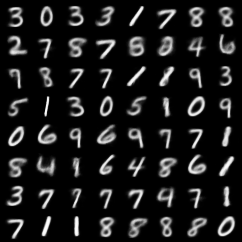

In [12]:
# Display the image in the Jupyter Lab cell
from IPython.display import Image, display
display(Image(filename=image_path))

## Variational Autoencoder for Dimension Reduction: 

In [7]:
### Let's Define the architecture 
# build model
vae = VAE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    vae.cuda()

In [8]:
vae

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=2, bias=True)
  (fc32): Linear(in_features=256, out_features=2, bias=True)
  (fc4): Linear(in_features=2, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = vae.to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item() / len(data):.6f}')
    print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset):.4f}')

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon, mu, logvar = model(data)
            test_loss += loss_function(recon, data, mu, logvar).item()

    test_loss /= len(test_loader.dataset)
    print(f'====> Test set loss: {test_loss:.4f}')

for epoch in range(1, 11):
    train(epoch)
    test(epoch)


Train Epoch: 1 [0/60000 (0%)]	Loss: 546.667500
Train Epoch: 1 [10000/60000 (17%)]	Loss: 180.134141
Train Epoch: 1 [20000/60000 (33%)]	Loss: 175.670312
Train Epoch: 1 [30000/60000 (50%)]	Loss: 167.976738
Train Epoch: 1 [40000/60000 (67%)]	Loss: 164.123574
Train Epoch: 1 [50000/60000 (83%)]	Loss: 159.861514
====> Epoch: 1 Average loss: 178.0519
====> Test set loss: 162.1359
Train Epoch: 2 [0/60000 (0%)]	Loss: 163.034756
Train Epoch: 2 [10000/60000 (17%)]	Loss: 163.066797
Train Epoch: 2 [20000/60000 (33%)]	Loss: 164.570332
Train Epoch: 2 [30000/60000 (50%)]	Loss: 157.983105
Train Epoch: 2 [40000/60000 (67%)]	Loss: 156.897510
Train Epoch: 2 [50000/60000 (83%)]	Loss: 154.819111
====> Epoch: 2 Average loss: 157.5293
====> Test set loss: 154.0133
Train Epoch: 3 [0/60000 (0%)]	Loss: 149.520449
Train Epoch: 3 [10000/60000 (17%)]	Loss: 147.262568
Train Epoch: 3 [20000/60000 (33%)]	Loss: 153.562295
Train Epoch: 3 [30000/60000 (50%)]	Loss: 147.463945
Train Epoch: 3 [40000/60000 (67%)]	Loss: 151.85

In [ ]:
# Set the backend for Matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_latent_space(model, data_loader, num_batches=100):
    model.eval()
    latents = []
    labels = []
    
    with torch.no_grad():
        for i, (data, label) in enumerate(data_loader):
            if i >= num_batches:
                break
            data = data.to(device)
            mu, _ = model.encoder(data.view(-1, 784))
            latents.append(mu.cpu().numpy())
            labels.append(label.numpy())

    latents = np.concatenate(latents, axis=0)
    labels = np.concatenate(labels, axis=0)

    return latents, labels

latents, labels = plot_latent_space(model, test_loader)


# Confirm that 'data' is a numpy array
if not isinstance(latents, np.ndarray):
    raise ValueError("The input data is not a numpy array.")

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(latents[:, 0], latents[:, 1], alpha=0.7, s=2)
plt.title("Scatter Plot of Latent Space")
plt.xlabel("Latent Dimension 1"
plt.ylabel("Latent Dimension 2")

References: 

https://arxiv.org/abs/2003.05991 

https://arxiv.org/abs/1312.6114

https://arxiv.org/abs/1506.02216

https://arxiv.org/abs/1606.05579